# TITANIC CASE STUDY

Problem Statement:
    
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. 
It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, 
and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary 
passenger on Titanic would survive the sinking or not. 

Descritption of Data set(Input Variable):
PassenegrId:
Ages:
Sexes:
Parch:
Fair
Cabin:
Sibling counts:
Embarked:
Class:
Ticket:    
Target:"Survived" column is our dependent variable as we need to determine whether the peroson is survived or not.

In [1]:
#loading the required libraries
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
df.columns #we can see various columns names.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [5]:
df.shape #this shows there are 891 rows and 12 columns

(891, 12)

In [6]:
df.head() #shows first five rows of the dataset.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Observation :
    1.Features are on different scale,we need to convert them into stanadrd sclae/same format.
    
    2.Categoricals columns has to convert into numericals columns
    
    3.We also see NAN values in cabin column where we need to apply imputation technique 
    
    4.Survived: 1 & 0 are marked whcih may be 1 for survived and 0 for not survived
    
    5.Pclass: three classes:upper (1),middle class(2),lower class(3)
    
    6.Sex:Male or Female
    
    7.Sibsp: denotes siblings and spouse  boarded on ship
    8.Parch:denoted parents and children boarded on ship
    
    8.Ticket:conatins Mix of alphanumerica characters
    
    9. Embarked:means port,S means southampton,C means Cherbough,Q-queenstown

In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Features are mix of integer type,float type and object type.before processing into model,we need to convert it. 

In [9]:
df['Sex'] #male and female present

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [10]:
df['Sex'].value_counts() # Thus 35% of the passenger boarded on ship are females and rest males. 

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df['Survived']  #in 0 and 1 form ,0-not survived and 1-Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
df['Survived'].value_counts() # 38% of the passenger boarded on ship has survived and unfortunatly rest are not survived.

0    549
1    342
Name: Survived, dtype: int64

In [13]:
df['Pclass'] #There are three classes 1-upper,2-middle,3-lower class

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [14]:
df['Pclass'].value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

#About 55% people belong to the lower class ,24% of them belong to upper class and 21% belongs to middle class Thus more number of people belong to lower class 

In [15]:
df['SibSp'] 

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [16]:
df['SibSp'].value_counts() 

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

This shows around 608 passenger boarded on ship do not have any sibling or spouse i.e 68% ppl dont have sibling/spouse 
and rest 32% ppl either have sibling or spouse.
209 ppl have one sibling or spouse,
28 ppl have 2 sibling/spouse,
18 ppl have 4 siblings/spouse,
16 ppl have 3 siblings/spouse
7 ppl have 8 siblings/spouse,
5 ppl have 5 siblings/spouse.

In [17]:
df['Cabin'] #Nan values present

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [18]:
df['Cabin'].value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
F33                3
E101               3
D                  3
C22 C26            3
F2                 3
B51 B53 B55        2
E8                 2
C123               2
E121               2
D26                2
F4                 2
C52                2
B49                2
D36                2
B22                2
E33                2
B18                2
E44                2
F G73              2
C78                2
C125               2
E25                2
C65                2
C92                2
C124               2
D33                2
C126               2
C93                2
B57 B59 B63 B66    2
E67                2
B5                 2
B35                2
D20                2
B20                2
D35                2
C83                2
B77                2
B58 B60            2
E24                2
C2                 2
B28                2
D17                2
C68                2
E50                1
C86          

 #shows whuch cabin ppl are allocated,siblings and spouse/parents belong to the same cabin

In [19]:
df['Embarked' ] #S,C,Q mainly ports names S-Southampton,C-,Q-Queenstown

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [20]:
df['Embarked'].value_counts() #embarked means the port in which a passenger started a journey

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Thus we see around 644 ppl embarked from port S-Southampton i.e 72% which is quite high.
19% from port C-Cherbourg and rest 9% from Q-Queenstown 

In [21]:
df['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [22]:
df['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

76% of passeneger dont have parents or children boarded on ship and rest 24% have either parents or children boarded.

In [23]:
df['Age'] #contains Nan value

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [24]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
30.00    25
21.00    24
25.00    23
36.00    22
29.00    20
35.00    18
32.00    18
27.00    18
26.00    18
16.00    17
31.00    17
33.00    15
34.00    15
23.00    15
20.00    15
39.00    14
42.00    13
40.00    13
17.00    13
45.00    12
38.00    11
4.00     10
2.00     10
50.00    10
47.00     9
48.00     9
44.00     9
9.00      8
54.00     8
51.00     7
1.00      7
14.00     6
3.00      6
41.00     6
37.00     6
52.00     6
49.00     6
15.00     5
43.00     5
58.00     5
8.00      4
60.00     4
11.00     4
56.00     4
5.00      4
62.00     4
65.00     3
7.00      3
61.00     3
46.00     3
6.00      3
40.50     2
10.00     2
0.75      2
30.50     2
64.00     2
32.50     2
0.83      2
59.00     2
70.00     2
63.00     2
28.50     2
71.00     2
13.00     2
57.00     2
55.00     2
45.50     2
24.50     1
66.00     1
20.50     1
0.67      1
80.00     1
14.50     1
34.50     1
23.50     1
53.00     1
36.50     1
0.42      1
55.5

1.There are few elderly passengers within age range 60-80.

2.We can also see from the data above  children and babies are also boarded on the ship 

In [25]:
df['Fare'].value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
0.0000      15
26.5500     15
7.2292      15
8.6625      13
7.2500      13
7.8542      13
7.2250      12
16.1000      9
9.5000       9
15.5000      8
24.1500      8
14.4542      7
56.4958      7
7.0500       7
69.5500      7
52.0000      7
14.5000      7
31.2750      7
26.2500      6
46.9000      6
27.9000      6
30.0000      6
39.6875      6
7.7958       6
21.0000      6
53.1000      5
27.7208      5
30.5000      5
73.5000      5
29.1250      5
15.2458      5
19.2583      4
12.4750      4
21.0750      4
7.8792       4
7.6500       4
35.5000      4
110.8833     4
13.5000      4
7.1250       4
7.5500       4
31.3875      4
120.0000     4
151.5500     4
79.2000      4
263.0000     4
39.0000      4
23.0000      4
11.5000      4
27.7500      4
34.3750      4
227.5250     4
90.0000      4
15.8500      4
7.7333       4
25.4667      4
26.2875      3
14.4583      3
135.6333  

We can see even passenger has given high fare about 512 dollar.

In [26]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observation:
1.38% of the passenger survived on average.

2.Age-minimum age was 0.42 yrs  and maximum was 80 years.Also missing values are present in Age as the count is 741. 

3.Fare-Minimum fare was 0 which cant be possible and the maximum fare was 512.32dollar.

4.Mean =Mode in Passengerid that means having normal distribution curve.

5.High standard deviation in passengerid,Age,Fare.

6.there is high gap bw max and 75% in passengerid,Age,Fare means outliers are there.

In [27]:
df.isnull().sum() #77% of missing value present in Cabin,we may drop the column we need to check its correlation with survival.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that there around 177 missing values in age columns,687 missing values in cabin columns and 2 missing values
in embarked column.We will use imputaion and mode technique later 

<AxesSubplot:>

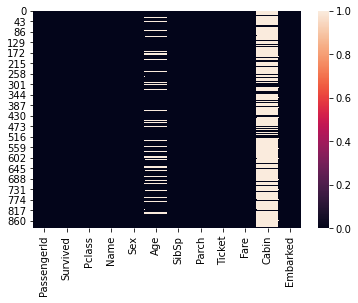

In [28]:
sns.heatmap(df.isnull()) 

visually it shows missing values present as there white shades inside the image which indicates missing values. in age and cabin cloumn mostly

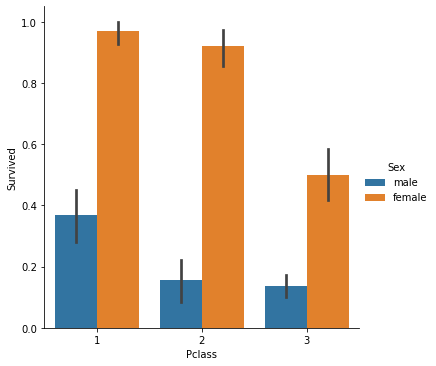

In [29]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df,kind='bar')
plt.show()

1.Mjaority of the woman have survided in first class.Very few males have survived in first class as they had paid highfare,life boats available.

2.Majority of the woman have survived but no man survied in second class

3.No one survided in third class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

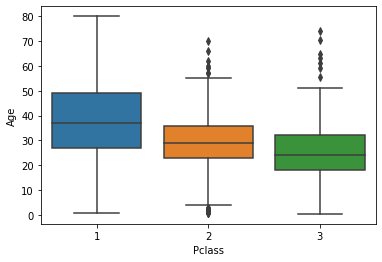

In [30]:
sns.boxplot(x="Pclass", y="Age", data=df)

The average age passenger travelling in first class was 35-38 years wheares in
middle class it was 30myearsand third class 25 yrs on average

Let's observe the survival of people following the categorical features.

In [31]:
df[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


#Upper class have higher chnaces of survival

In [32]:
df[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


#Female have higher chances of survival

In [33]:
df[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Passenegr boarded from Cherbourg has a high factor a survival and Southampton decreases the chance of survival.

In [34]:
df[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [35]:
df[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


Having more relations/kith-kins have less chance of survival.

Conclusiom:
   
1.Pclass and Sex has a great correlation with the survival of people so we consider them as imp. features
2.SibSp & Parch require engineering.
3.Embarked: we can keep this featurs but need to do hot encoding.

In [36]:
#Categorical Analysis
obj = ['Name', 'Sex','Ticket','Cabin','Embarked']
for column in df[obj]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

NAME :  891
Cleaver, Miss. Alice                                   1
Parkes, Mr. Francis "Frank"                            1
Reed, Mr. James George                                 1
Banfield, Mr. Frederick James                          1
Kirkland, Rev. Charles Leonard                         1
                                                      ..
Saundercock, Mr. William Henry                         1
Jenkin, Mr. Stephen Curnow                             1
Holverson, Mrs. Alexander Oskar (Mary Aline Towner)    1
Brocklebank, Mr. William Alfred                        1
Torber, Mr. Ernst William                              1
Name: Name, Length: 891, dtype: int64


SEX :  2
female    314
male      577
Name: Sex, dtype: int64


TICKET :  681
113792           1
374746           1
SC/PARIS 2146    1
211536           1
364850           1
                ..
347088           6
CA 2144          6
1601             7
347082           7
CA. 2343         7
Name: Ticket, Length: 681, dtype: i

In [37]:
#Categorical Analysis
def univariateAnalysis_category(obj):
    print("Details of " + obj)
    print("----------------------------------------------------------------")
    print(df[obj].value_counts())
    plt.figure()
    df[obj].value_counts().plot.bar(title="Frequency Distribution of " + obj)#, color = "blue")
    plt.show()
    print("       ")

Details of Name
----------------------------------------------------------------
Cleaver, Miss. Alice                   1
McCoy, Mr. Bernard                     1
Peduzzi, Mr. Joseph                    1
Mineff, Mr. Ivan                       1
Calic, Mr. Jovo                        1
                                      ..
Daniel, Mr. Robert Williams            1
Cacic, Miss. Marija                    1
Simonius-Blumer, Col. Oberst Alfons    1
Ling, Mr. Lee                          1
Torber, Mr. Ernst William              1
Name: Name, Length: 891, dtype: int64


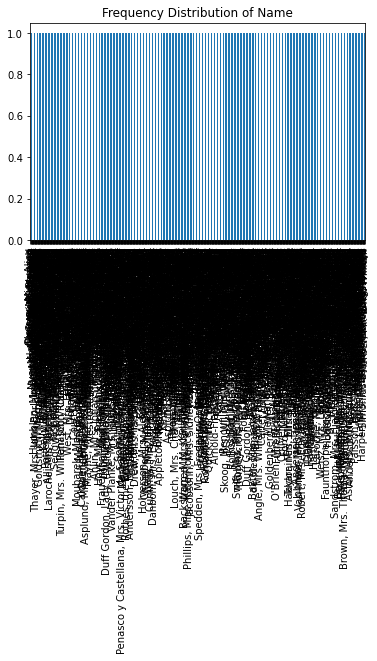

       
Details of Sex
----------------------------------------------------------------
male      577
female    314
Name: Sex, dtype: int64


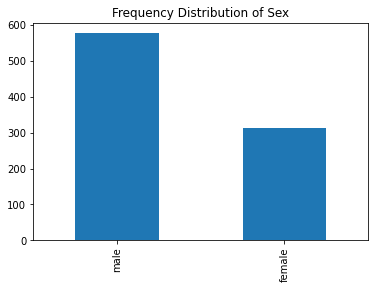

       
Details of Ticket
----------------------------------------------------------------
CA. 2343            7
347082              7
1601                7
CA 2144             6
347088              6
                   ..
250652              1
SC/PARIS 2167       1
349246              1
STON/O2. 3101271    1
312991              1
Name: Ticket, Length: 681, dtype: int64


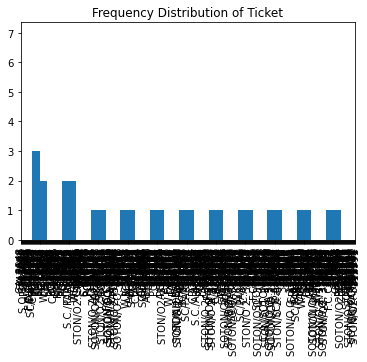

       
Details of Cabin
----------------------------------------------------------------
C23 C25 C27        4
G6                 4
B96 B98            4
F33                3
E101               3
D                  3
C22 C26            3
F2                 3
B51 B53 B55        2
E8                 2
C123               2
E121               2
D26                2
F4                 2
C52                2
B49                2
D36                2
B22                2
E33                2
B18                2
E44                2
F G73              2
C78                2
C125               2
E25                2
C65                2
C92                2
C124               2
D33                2
C126               2
C93                2
B57 B59 B63 B66    2
E67                2
B5                 2
B35                2
D20                2
B20                2
D35                2
C83                2
B77                2
B58 B60            2
E24                2
C2                 2
B28    

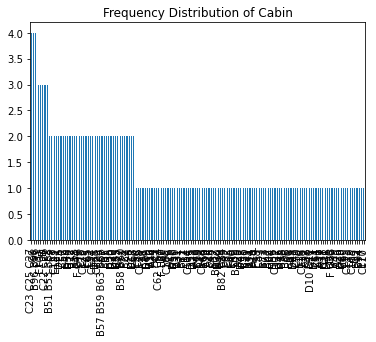

       
Details of Embarked
----------------------------------------------------------------
S    644
C    168
Q     77
Name: Embarked, dtype: int64


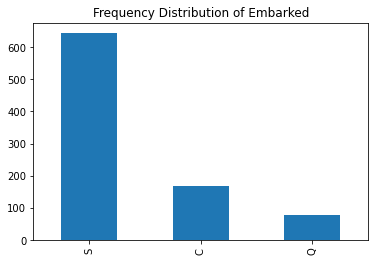

In [38]:
for x in obj:
    univariateAnalysis_category(x)

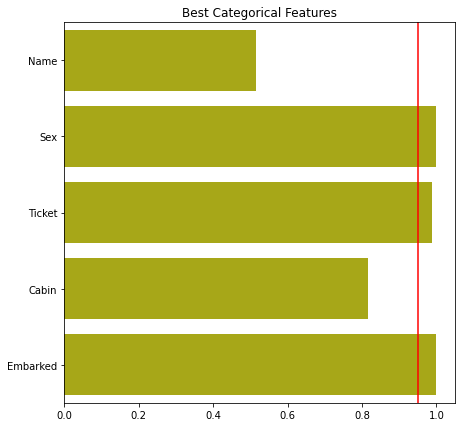

In [39]:
#Chi Square test for Categorical Columns to select best features for survived dependent column 
from scipy.stats import chi2_contingency
l=[]
for i in obj:
    pvalue  = chi2_contingency(pd.crosstab(df['Survived'],df[i]))[1]
    l.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=l, y=obj, color ='y')
plt.title('Best Categorical Features')
plt.axvline(x=(1-0.05),color='r')
plt.show()

It seems that sex,Ticket and Cabin are relatively significant for dependent column 'Survived' compare to name,cabin,
so we can drop this name and cabin column 

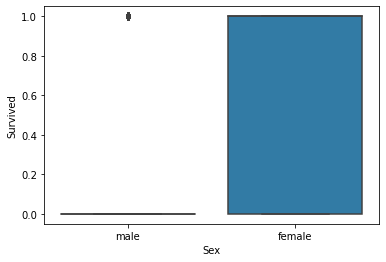

In [40]:
#BOX PLOT OF CATEGORICAL FEATURES

sns.boxplot(x='Sex', y = 'Survived', data=df, palette= "YlGnBu");
#df[non_obj].boxplot(figsize=(15,5))

In [41]:
non_obj = ['PassengerId', 'Survived','Pclass','Age','SibSp','Parch','Fare']
len(obj)

5

In [42]:
def univariateAnalysis_numeric(non_obj,nbins):   
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    sns.displot(df[non_obj], kde=True)#, color='blue')
    plt.title("Distribution of " + non_obj)
    plt.show()
    
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    ax = df.boxplot(non_obj,patch_artist=True)
    #for box in ax['boxes']:
    #    box.set(color='y', linewidth=2)
    #    box.set(facecolor = 'green')
        #box.set(hatch = '/')
    plt.title("BoxPlot of " + non_obj)
    # plt.xlabel(non_obj)
    plt.ylabel('Values')
    plt.show()

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

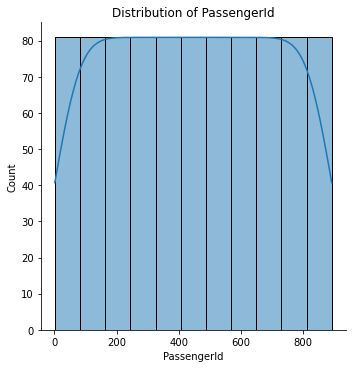

----------------------------------------------------------------------------


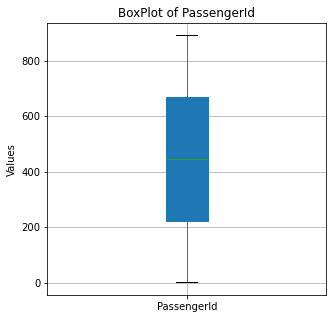

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

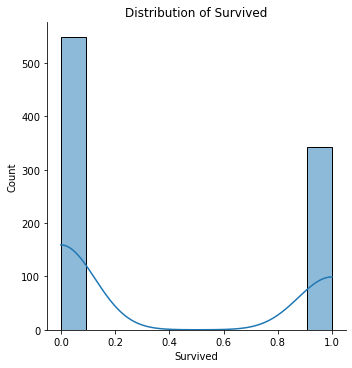

----------------------------------------------------------------------------


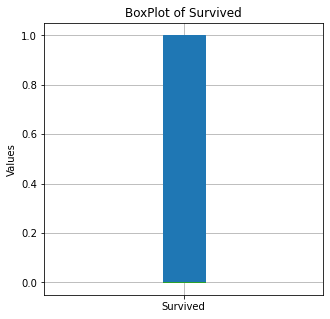

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

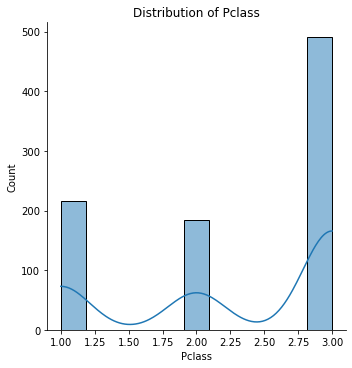

----------------------------------------------------------------------------


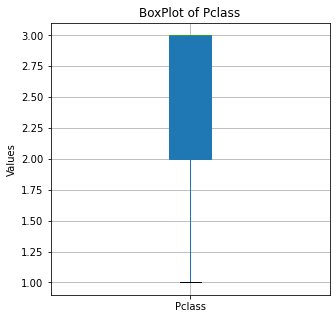

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

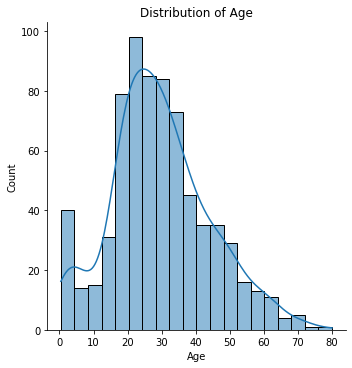

----------------------------------------------------------------------------


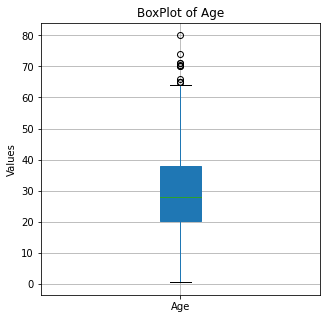

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

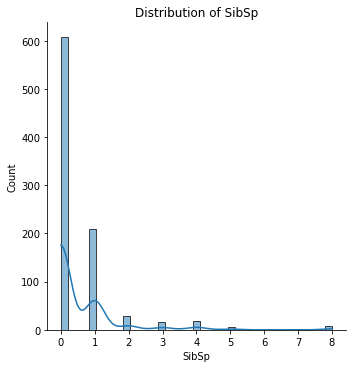

----------------------------------------------------------------------------


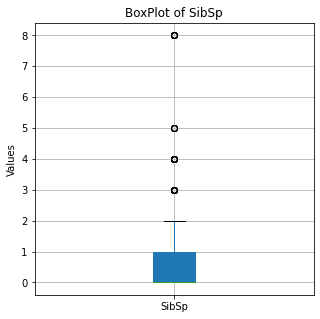

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

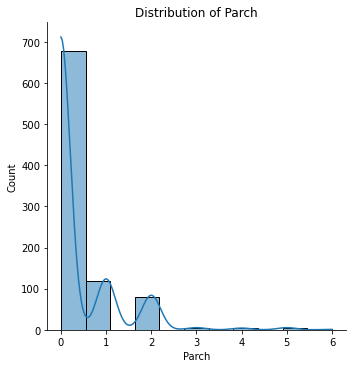

----------------------------------------------------------------------------


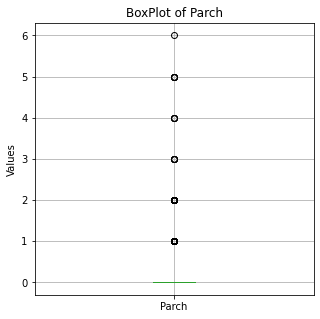

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

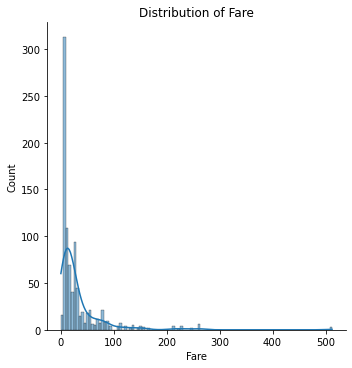

----------------------------------------------------------------------------


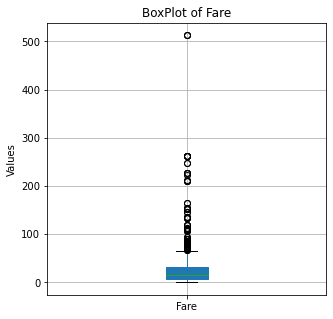

In [43]:
for x in non_obj:
    univariateAnalysis_numeric(x, 100);

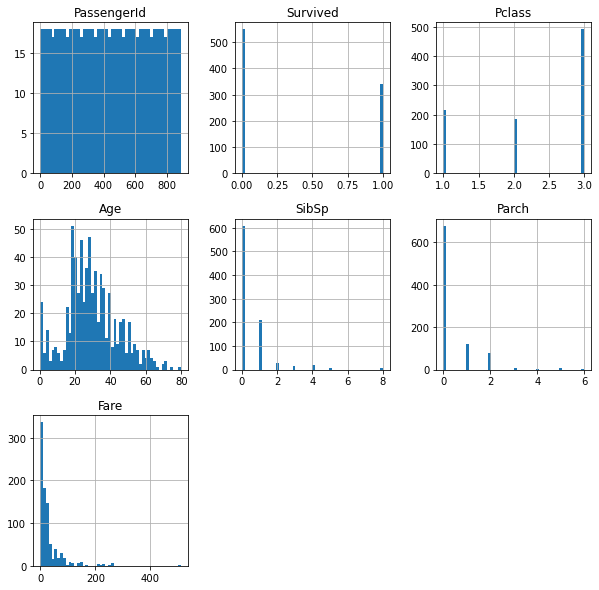

In [44]:
df.hist(figsize=(10,10),bins=50)
plt.show()

#Normal distribution curve in passenger id,others are not normally distributed. 

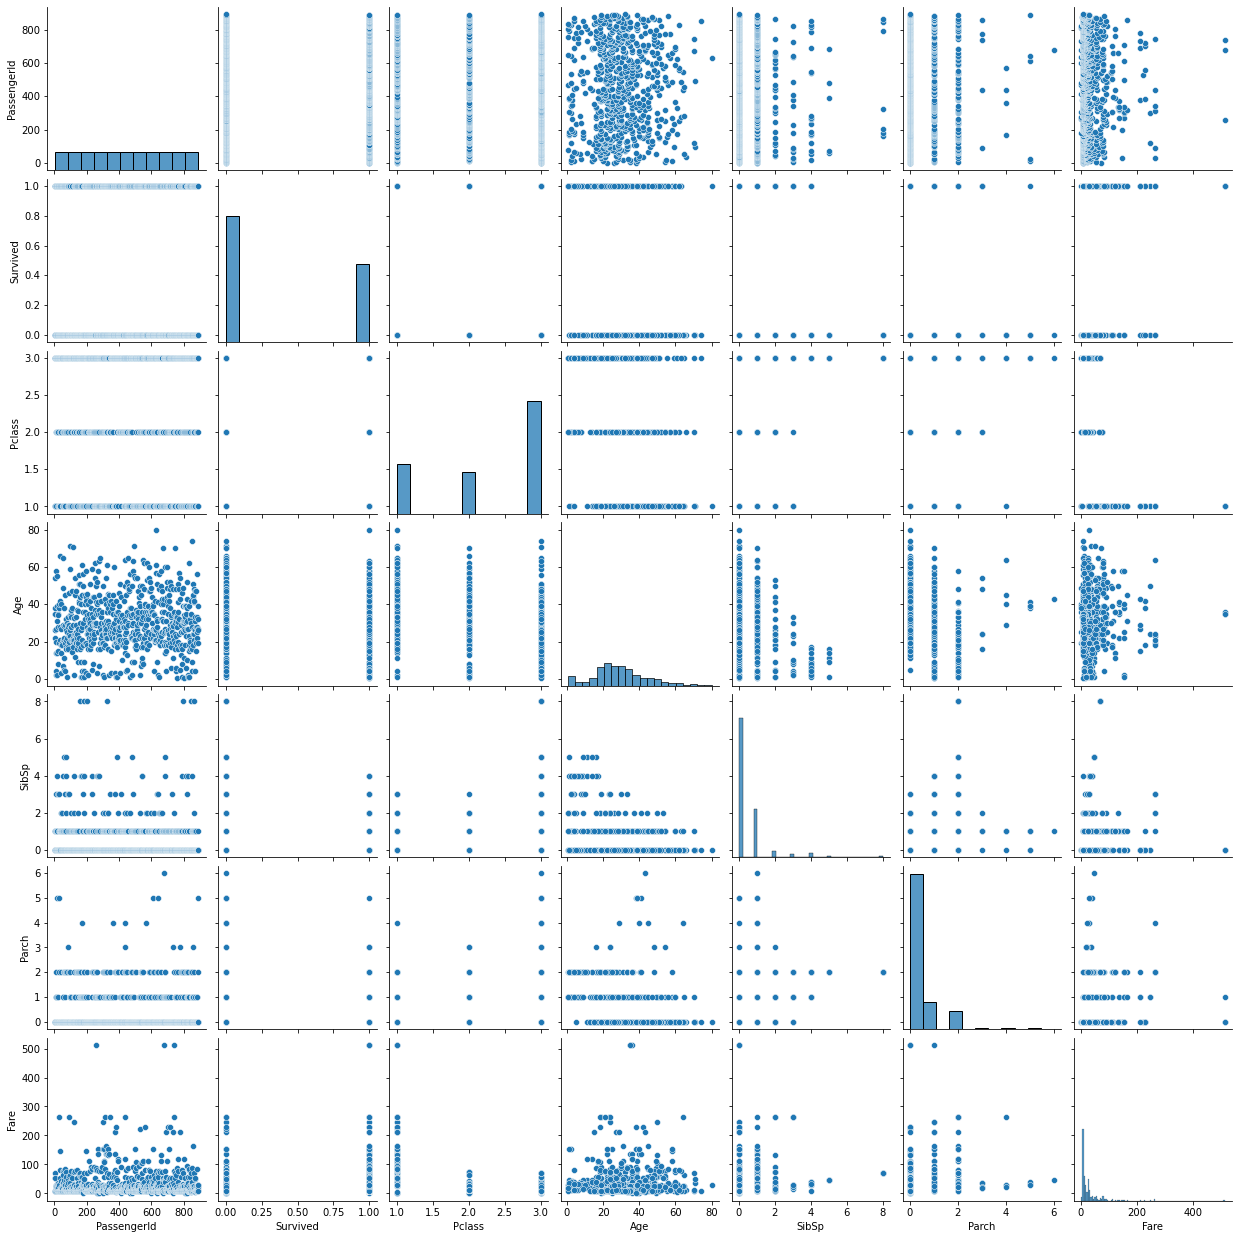

In [45]:
sns.pairplot(df)

We can see various distribution among columns and also correlation.

# Handling the missing values:

In [46]:
df.Age.fillna(df.Age.mean(),inplace = True)

In [47]:
df.Embarked.fillna(df.Embarked.mode()[0],inplace = True)

We saw above that around 77% of missing value present in Cabin column,if we apply imputation technique 
then it would result in biasness,dropping the column is suggested.

In [48]:
df = df.drop(columns='Cabin', axis=1)

In [49]:
df.isnull().sum() #validating the missing value 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

 As the datatyes has 5 object/strings datatype.We will use encoding technique to the string data into numerical.

In [50]:
from sklearn.preprocessing import OrdinalEncoder
en=OrdinalEncoder()

In [51]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))

In [52]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,2.0
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,0.0
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,2.0
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,2.0
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.000000,0,0,101.0,13.0000,2.0
887,888,1,1,303.0,0.0,19.000000,0,0,14.0,30.0000,2.0
888,889,0,3,413.0,0.0,29.699118,1,2,675.0,23.4500,2.0
889,890,1,1,81.0,1.0,26.000000,0,0,8.0,30.0000,0.0


Correlation of the columns with the target column

In [53]:
df.corr() #showing coreerelation with all the features

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.162098
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,-0.006117
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.001729
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.224719


In [54]:
df.corr()["Survived"].sort_values()

Sex           -0.543351
Pclass        -0.338481
Embarked      -0.167675
Ticket        -0.164549
Age           -0.069809
Name          -0.057343
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

Target column"Survived is strongly correlated with Fare,Parch means those
who have given high fare ,their chances of survival is high ,
also those who have childrens/parents their chnace of survival is high
others negatively correlated. 

<AxesSubplot:title={'center':'Correlation Matrix'}>

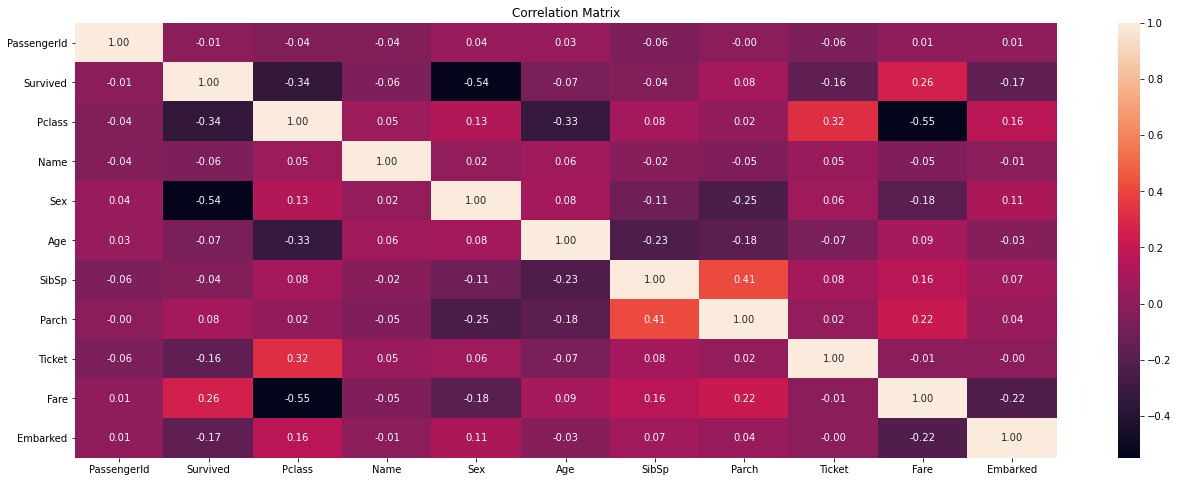

In [55]:
plt.figure(figsize=(22,8))
plt.title("Correlation Matrix")
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [56]:
#Parch and SibSp are strongly  correlated at 41% 
#Ticket and Pclass are strongly correlated at 32%
#Fare and survived are correlated at 26%.

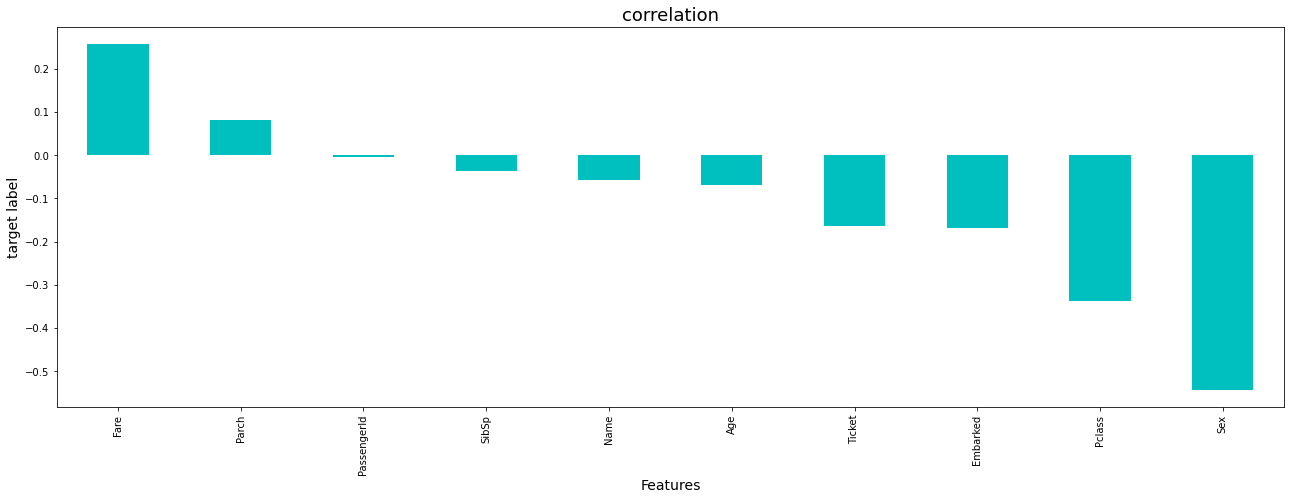

In [57]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('target label',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

#checking skewness

In [58]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.264823
dtype: float64

considering the skewness range as -/+0.7,so we see that skewness is present in Sibsp,Parch,Fare,Embarked.

As Sibsp,Parch,Embarked are categorical column,so we dont check skewness here.

We can treat skewness in Fare as below

In [59]:
#removing the skewness of height
import numpy as np
df['Fare']=np.sqrt(df['Fare'])
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           2.085004
Embarked      -1.264823
dtype: float64

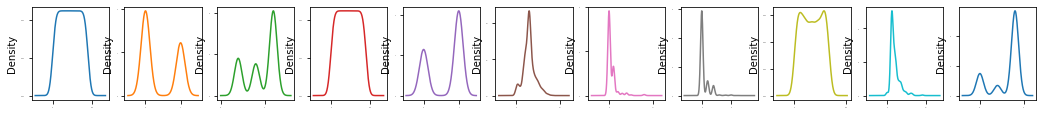

In [60]:
df.plot(kind="density",subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

checking outliers 

PassengerId       AxesSubplot(0.125,0.749828;0.0824468x0.130172)
Survived       AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
Pclass         AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
Name           AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
Sex            AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
Age            AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
SibSp          AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
Parch          AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
Ticket            AxesSubplot(0.125,0.593621;0.0824468x0.130172)
Fare           AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
Embarked       AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
dtype: object

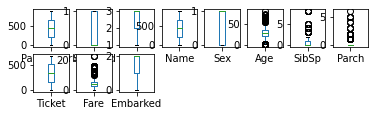

In [61]:
df.plot(kind ='box',subplots = True, layout =(5,8),sharex = False)

plotting box plot for differnt column to get clear picture of outliers

<AxesSubplot:>

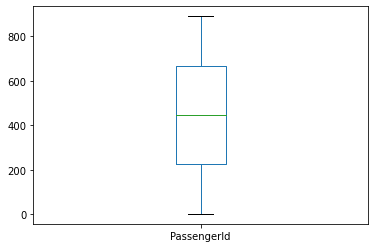

In [62]:
df['PassengerId'].plot.box()

<AxesSubplot:>

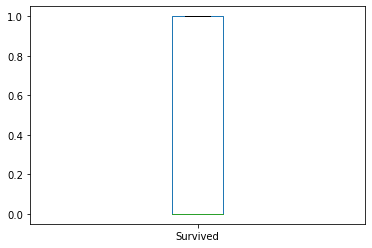

In [63]:
df['Survived'].plot.box()

<AxesSubplot:>

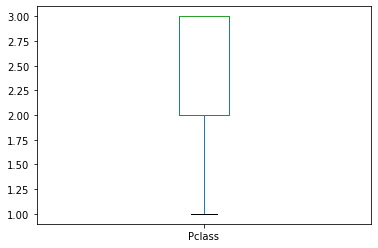

In [64]:
df['Pclass'].plot.box()

<AxesSubplot:>

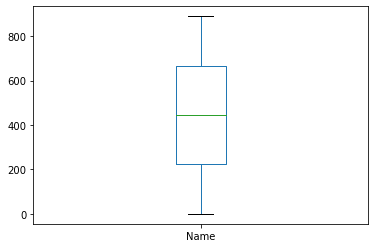

In [65]:
df['Name'].plot.box()

<AxesSubplot:>

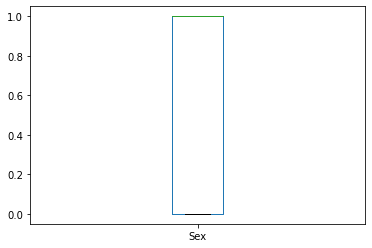

In [66]:
df['Sex'].plot.box()

<AxesSubplot:>

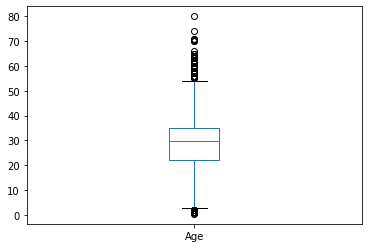

In [67]:
df['Age'].plot.box()

<AxesSubplot:>

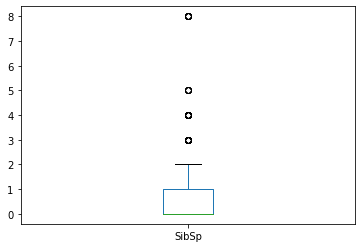

In [68]:
df['SibSp'].plot.box()

<AxesSubplot:>

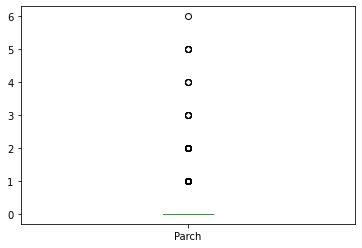

In [69]:
df['Parch'].plot.box()

<AxesSubplot:>

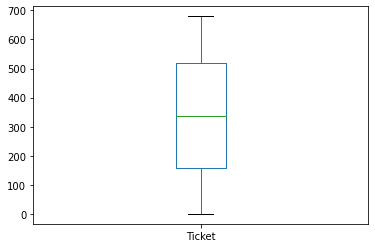

In [70]:
df['Ticket'].plot.box()

<AxesSubplot:>

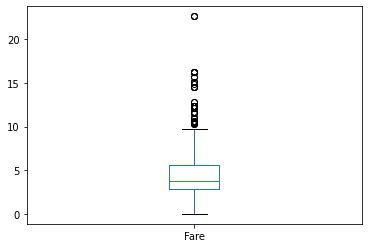

In [71]:
df['Fare'].plot.box()

<AxesSubplot:>

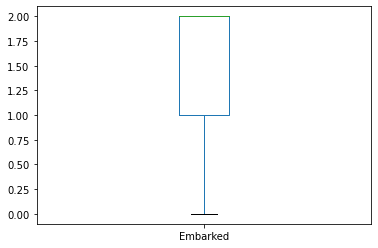

In [72]:
df['Embarked'].plot.box()

We see that outliers are present in Age,SibSp,Parch,Fare 

In [73]:
#Removing outliers
df.shape

(891, 11)

In [74]:
from scipy.stats import zscore
dfzcore=np.abs(zscore(df))
print(np.where(dfzcore>3)) #those coeffiecients value  greater than 3 are displayed as outliers.

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([7, 6, 7, 9, 6, 6, 6, 6, 7, 9, 5, 5, 9, 6, 6, 6, 7, 6, 6, 6, 6, 6,
       9, 6, 6, 6, 9, 9, 6, 9, 7, 9, 9, 6, 7, 7, 9, 6, 5, 9, 6, 6, 9, 7,
       7, 5, 7, 5, 7, 9, 6, 6, 9, 9, 9, 9, 7, 9, 9, 5, 7, 9, 6, 6, 6, 6,
       6, 6, 5, 7, 6, 7], dtype=int64))


In [75]:
#Removing outliers
dfnew=df[(dfzcore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)
df=dfnew

dfnew.shape= (820, 11)


In [76]:
#Percentage data loss
Data_loss=((891-820)/891)*100

In [77]:
Data_loss #loss is around 7% whcih is acceptable

7.968574635241302

# Separating the Columns into features and Target

In [78]:
x_features=df.drop('Survived',axis=1)
y_target=df["Survived"]

# Scaling the data using StandardScaler

In [79]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler
x_features=mms().fit_transform(x_features)

# Base model:Logistic Regression

In [80]:
lg = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [105]:
for i in range(0,500):
    x_train, x_test, y_train, y_test = train_test_split(x_features,y_target, test_size=0.2, random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random State",i,"The model performs well")
        print("At Random state:",i)
        print(f"At random state,the training accuracy  is:-", accuracy_score(y_train,pred_train)*100)
        print(f"At random state,the testing accuracy is:-", accuracy_score(y_test,pred_test)*100)   
        print("\n")

At Random State 118 The model performs well
At Random state: 118
At random state,the training accuracy  is:- 80.48780487804879
At random state,the testing accuracy is:- 80.48780487804879


At Random State 127 The model performs well
At Random state: 127
At random state,the training accuracy  is:- 80.48780487804879
At random state,the testing accuracy is:- 80.48780487804879


At Random State 170 The model performs well
At Random state: 170
At random state,the training accuracy  is:- 79.8780487804878
At random state,the testing accuracy is:- 79.8780487804878


At Random State 215 The model performs well
At Random state: 215
At random state,the training accuracy  is:- 80.48780487804879
At random state,the testing accuracy is:- 80.48780487804879


At Random State 247 The model performs well
At Random state: 247
At random state,the training accuracy  is:- 80.48780487804879
At random state,the testing accuracy is:- 80.48780487804879


At Random State 268 The model performs well
At Random sta

Thus we see at random_state=118,the model performs well as the training accuracy and testing accurcay is same.  

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x_features,y_target, test_size=0.2, random_state=118)

In [83]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[61 35]
 [40 28]]
              precision    recall  f1-score   support

           0       0.60      0.64      0.62        96
           1       0.44      0.41      0.43        68

    accuracy                           0.54       164
   macro avg       0.52      0.52      0.52       164
weighted avg       0.54      0.54      0.54       164



The accuracy of the model is 52%

# Cross validation score for logistic regression

In [84]:
pred_lg=lg.predict(x_test)
from sklearn.model_selection import cross_val_score
css=accuracy_score(y_test,pred_lg)

In [85]:
for j in range(2,15):
    css_score=cross_val_score(lg,x_features,y_target,cv=j)
    csc=css_score.mean()
    print("At cv:-",j)
    print("cross validation score is :-",csc*100)
    print("accuracy score is :-",css*100)
    print('\n')

At cv:- 2
cross validation score is :- 78.29268292682927
accuracy score is :- 82.92682926829268


At cv:- 3
cross validation score is :- 79.51257987754337
accuracy score is :- 82.92682926829268


At cv:- 4
cross validation score is :- 79.75609756097562
accuracy score is :- 82.92682926829268


At cv:- 5
cross validation score is :- 79.02439024390245
accuracy score is :- 82.92682926829268


At cv:- 6
cross validation score is :- 79.3902962644912
accuracy score is :- 82.92682926829268


At cv:- 7
cross validation score is :- 80.00144864551643
accuracy score is :- 82.92682926829268


At cv:- 8
cross validation score is :- 79.87697506186942
accuracy score is :- 82.92682926829268


At cv:- 9
cross validation score is :- 79.87869618304401
accuracy score is :- 82.92682926829268


At cv:- 10
cross validation score is :- 79.63414634146342
accuracy score is :- 82.92682926829268


At cv:- 11
cross validation score is :- 80.0
accuracy score is :- 82.92682926829268


At cv:- 12
cross validation scor

At cross validation at 2,the accuracy score and cross validation score almost equal we will take cv=2 
and rest other cross validation score and accuracy score not high gaps present that means we are in right approach

In [86]:
csc_selected=cross_val_score(lg,x_features,y_target,cv=118).mean()
print("The  cv score is :-",csc_selected *100,"\n The accuracy score is ",css*100)

The  cv score is :- 79.90314769975785 
 The accuracy score is  82.92682926829268


The final accuracy score of the model is 79% during cross validation

# Modelling-Other models

In [87]:
#Modelling
#Model 1-Decision Tree

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1=DecisionTreeClassifier(random_state=45)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[78 18]
 [21 47]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        96
           1       0.72      0.69      0.71        68

    accuracy                           0.76       164
   macro avg       0.76      0.75      0.75       164
weighted avg       0.76      0.76      0.76       164



In [88]:
#Model 2-Random Forest

from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier(random_state=45)
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[88  8]
 [22 46]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        96
           1       0.85      0.68      0.75        68

    accuracy                           0.82       164
   macro avg       0.83      0.80      0.80       164
weighted avg       0.82      0.82      0.81       164



In [89]:
#Model 3-Ada Boost

from sklearn.ensemble import AdaBoostClassifier

model3=AdaBoostClassifier(random_state=45)
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[86 10]
 [17 51]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        96
           1       0.84      0.75      0.79        68

    accuracy                           0.84       164
   macro avg       0.84      0.82      0.83       164
weighted avg       0.84      0.84      0.83       164



In [90]:
#Model 4-Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

model4=GradientBoostingClassifier(random_state=45)
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[85 11]
 [24 44]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        96
           1       0.80      0.65      0.72        68

    accuracy                           0.79       164
   macro avg       0.79      0.77      0.77       164
weighted avg       0.79      0.79      0.78       164



In [91]:
#Model 5-SVM
from sklearn.svm import SVC
model5=SVC(random_state=1)
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[84 12]
 [15 53]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        96
           1       0.82      0.78      0.80        68

    accuracy                           0.84       164
   macro avg       0.83      0.83      0.83       164
weighted avg       0.83      0.84      0.83       164



Thus we see,
   1. The accuracy score of Decision tree classifier is 70% with f1 score for survival rate score is 66%
    
   2. The accuracy score of Random Forest Classifier is 82% with f1 score for survival rate score is 77%

   3.The accuracy score of AdaBoost is 82% with f1 score for survival rate is 77%
    
   4.The accuracy score of Gradient Boosting is 81% with f1 score for survival rate score  is 76%

   5.The accuracy score of Support vector machine (SVM) is 81% with f1 score for survival rate score is 76%
    
   6.The base model(logistic regression) accuracy score is 54% with f1 score as 43% after applying cv ,score improves to 79%
    
Conclusion:
We see that AdaBoost Classifier,Random Forest Classifier,SVM Classifier,Gradient Boosting classifier are producing good    accuracy.

Now we will check cross validation technoque for overfitting.


# CROSS VALIDATION

Performing cross validation in all the models below:

In [92]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lg,x_features,y_target,cv=5)
print("The cross validation score of Logistic Regression model is :",scr.mean())

The cross validation score of Logistic Regression model is : 0.7902439024390244


The cross validation score of Logistic Regression model is : 0.7902439024390244

In [93]:
scr=cross_val_score(model1,x_features,y_target,cv=5)
print("The cross validation score of Desicion Tree Classifier is :",scr.mean())

The cross validation score of Desicion Tree Classifier is : 0.6951219512195121


The cross validation score of Desicion Tree Classifier is : 0.6951219512195121


In [94]:
scr=cross_val_score(model2,x_features,y_target,cv=5)
print("The cross validation score of Random Forest Classifier is :",scr.mean())

The cross validation score of Random Forest Classifier is : 0.8353658536585366


The cross validation score of Random Forest Classifier is : 0.8353658536585366

In [95]:
scr=cross_val_score(model3,x_features,y_target,cv=5)
print("The cross validation score of AdaBoost Classifier is :",scr.mean())

The cross validation score of AdaBoost Classifier is : 0.7390243902439024


The cross validation score of AdaBoost Classifier is : 0.7390243902439024


In [96]:
scr=cross_val_score(model4,x_features,y_target,cv=5)
print("The cross validation score of GradientBoosting Classifier is :",scr.mean())

The cross validation score of GradientBoosting Classifier is : 0.7926829268292682


The cross validation score of GradientBoosting Classifier is : 0.7926829268292682

In [97]:
scr=cross_val_score(model5,x_features,y_target,cv=5)
print("The cross validation score of SVM Classifier is :",scr.mean())

The cross validation score of SVM Classifier is : 0.8121951219512196


The cross validation score of SVM Classifier is : 0.8121951219512196

Thus we see that Random Forest classifier is performing better as the cross validation score is 83% comparing with otehr models ,so we will continue with Random Forest Model.

# HYper parameter tuning

In [98]:
from sklearn.model_selection import GridSearchCV
#creating parameter list to pass in gridsearchcv
parameters= {'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
GCV = GridSearchCV(RandomForestClassifier(),parameters, cv= 5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_ #printing the best parameter found by gridsearch cv

These are the best_params: criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}

In [100]:
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting with best paramter
accuracy_score(y_test,GCV_pred) #checking final accuracy

0.7926829268292683

This accuracy of Random forest model after hypertuning is 79% is more accurate than accuracy of Random forest without tuning above as in the model may be overfitted/biased.

# AUC_ROC PLOT

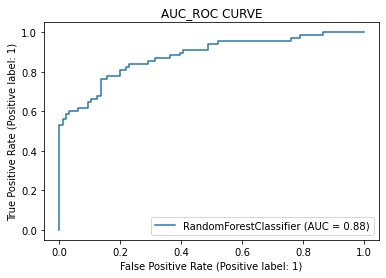

In [101]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("AUC_ROC CURVE")
plt.show()

OBSERVATION:
So final accuracy is 79% and AUC score is 88% which can be considered good which means higher chance of classifier to
disntinguish between positive values and  negative values. So it can distinguish between passenegrs who have survived and not survived.In other word we can say that  out of 100 prediction,88 predictions will be correct and 12 predictions will be wrong.

# MODEL SAVING 

In [102]:
#saving the Random forest Model with hypertuning best parameters
import pickle
filename='titanic.pkl'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

# CONCLUSION:


In [103]:
loaded_model=pickle.load(open('titanic.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100) #getting 79% score

79.26829268292683


In [104]:
import numpy as np
a=np.array(y_test)
predicted=np.array(GCV.best_estimator_.predict(x_test))
df_com=pd.DataFrame({"original":a,"Predicted":predicted},index=range(len(a)))
df_com

,original,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,0,1
5,0,0
6,0,0
7,0,0
8,1,0
9,0,0
